## 이커머스 데이터를 통한 고객 세분화 및 마케팅 전략 제안

### 배경

> 최근 종합몰 이커머스 플랫폼의 연간 매출 성장세가 둔화되며 마케팅 부서에서는 **고객 유지율 향상 및 재구매율 증대**를 위한 데이터 기반 전략이 필요하다는 판단을 내렸다. 지난 1년의 이커머스 데이터를 통해 고객을 세분화하여 이듬해 매출을 올릴 수 있는 마케팅 전략을 지원하기 위한 분석을 수행하고자 한다.


### 분석 목표

- 2019년 굿즈샵 거래 데이터 종합 분석
    - 매출 트렌드
    - 상품 및 상품카테고리 성과
    - 고객 유입 및 행동
    - 할인 및 프로모션 효과
- RFM 분석을 통한 고객 세분화 
    - 마케팅 타깃군을 선별하기 위한 고객 세분화 방법 마련 (i.e., VIP, 충성고객, 활성고객, 신규고객, 고가치 이탈위험고객, 비활성고객) 


### 활용 데이터

https://dacon.io/en/competitions/official/236222/data 에서 해당 데이터의 스키마 조회 가능

- 온라인 거래와 관련된 정보: Onlinesales_info.csv 
- 고객과 관련된 정보: Customer_info.csv
- 할인과 관련된 정보: Discount_info.csv
- 마케팅 비용과 관련된 정보: Marketing_info.csv
- 세금과 관련된 정보: Tax_info.csv





### Preprocessing


In [3]:
import pandas as pd
import numpy as np

In [ ]:
cust = pd.read_csv('./Customer_info.csv')
print(display(cust.head()))
print('\n')

disc = pd.read_csv('./Discount_info.csv')
print(display(disc.head()))
print('\n')

market = pd.read_csv('./Marketing_info.csv')
print(display(market.head()))
print('\n')

sales = pd.read_csv('./Onlinesales_info.csv')
print(display(sales.head()))
print('\n')

tax = pd.read_csv('./Tax_info.csv')
print(display(tax.head()))

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


None




In [5]:
# info

# cust
print(cust.info())
print(cust.describe())

# disc
print(disc.info())
print(disc.describe())

# market
print(market.info())
print(market.describe())

# tax
print(tax.info())
print(tax.describe())

# sales
print(sales.info())
print(sales.describe())

# tax
print(tax.info())
print(tax.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB
None
              가입기간
count  1468.000000
mean     25.912125
std      13.959667
min       2.000000
25%      14.000000
50%      26.000000
75%      38.000000
max      50.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None
              할인율
count  204.000000
mean    20.000000
std      8.185052
min 

In [6]:
# sales - 할인 코드 반영

disc = disc.replace('Jan', 1)
disc = disc.replace('Feb', 2)
disc = disc.replace('Mar', 3)
disc = disc.replace('Apr', 4)
disc = disc.replace('May', 5)
disc = disc.replace('Jun', 6)
disc = disc.replace('Jul', 7)
disc = disc.replace('Aug', 8)
disc = disc.replace('Sep', 9)
disc = disc.replace('Oct', 10)
disc = disc.replace('Nov', 11)
disc = disc.replace('Dec', 12)


/var/folders/yy/_061l71j3xb3mw44dldrpffc0000gn/T/ipykernel_3909/3332861501.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  disc = disc.replace('Dec', 12)


In [7]:
sales['거래월'] = pd.to_datetime(sales['거래날짜']).dt.month
sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,거래월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,1
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,12
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,12
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,12
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,12


In [8]:
sales = sales.rename(columns = {'거래월':'월'})
merged = sales.merge(disc, on = ['월','제품카테고리'], how='left')
merged.drop_duplicates(inplace=True)
merged['최종금액'] = np.where(merged['쿠폰상태'] == 'Used', 
                            merged['평균금액'] * (1 - merged['할인율'] / 100), merged['평균금액']
)
merged


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,ELEC10,10.0,138.339
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,ELEC10,10.0,138.339
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,1,OFF10,10.0,1.845
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,1,SALE10,10.0,17.530
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,1,AIO10,10.0,14.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,12,ELEC30,30.0,121.300
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,12,SALE30,30.0,34.244
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,12,ELEC30,30.0,106.316
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,12,ELEC30,30.0,80.520


In [9]:
merged.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10.0,138.339
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10.0,138.339
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1,OFF10,10.0,1.845
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1,SALE10,10.0,17.530
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1,AIO10,10.0,14.850


In [10]:
merged.to_csv('./sales_with_discount.csv')

In [12]:
# sales 데이터에서 고객수, 거래날짜(최소, 최대), 총거래액, 거래건수 추출
# 2019년 1월 ~ 12월까지의 데이터, 4.6백만달러, 

sales_info = pd.DataFrame({
    '고객수': [merged['고객ID'].nunique()],
    '거래날짜_최소': [merged['거래날짜'].min()],
    '거래날짜_최대': [merged['거래날짜'].max()],
    '총거래액': [(merged['수량'] * merged['최종금액']).sum()],
    '거래건수': [merged['거래날짜'].count()]
})

sales_info


,고객수,거래날짜_최소,거래날짜_최대,총거래액,거래건수
0,1468,2019-01-01,2019-12-31,4351608.242,52924


In [13]:
# 매출 데이터(sales)를 날짜별로 요약해서 하루 단위 매출 통계표
# 일별 평균 매출, 일별 주문수(거래_ID), 일별 건당 주문 금액, 고객 1명당 주문 금액, 주문 빈도, 주문 시 구매 품목 수, 1개 당 가격

summary = []

for i in merged['거래날짜'].unique(): #날짜 중복 방지

    tb = merged[merged['거래날짜'] == i] # 일자별 df 생성

    ord_amt = round((tb['수량'] * tb['최종금액']).sum(),2) # 총거래액
    ord_cnt = tb['거래ID'].nunique() # 총거래건수
    prd_cnt = tb['수량'].sum() #판매상품수량
    avg_ord_amt = round(ord_amt / ord_cnt,2) # 건당 평균거래액
    avg_prd_cnt = round(prd_cnt / ord_cnt,2) # 평균판매상품수량
    cust = tb['고객ID'].nunique() #구매고객수
    cust_val = round(ord_amt / cust,2) # 구매고객 평균거래액

    summary.append([i, ord_amt, ord_cnt, avg_ord_amt, avg_prd_cnt, cust, cust_val])

summary = pd.DataFrame(summary, 
          columns=['거래날짜', '총매출액', '총주문건수', '평균주문금액', 
                   '평균주문상품수량', '구매고객수', '구매고객평균거래액'])
summary

,거래날짜,총매출액,총주문건수,평균주문금액,평균주문상품수량,구매고객수,구매고객평균거래액
0,2019-01-01,7102.73,41,173.24,8.59,7,1014.68
1,2019-01-02,13028.74,71,183.50,3.61,10,1302.87
2,2019-01-03,23009.21,124,185.56,6.58,14,1643.52
3,2019-01-04,16076.39,89,180.63,6.79,6,2679.40
4,2019-01-05,16848.20,91,185.15,26.29,9,1872.02
...,...,...,...,...,...,...,...
360,2019-12-27,12456.51,68,183.18,4.09,7,1779.50
361,2019-12-28,9707.17,52,186.68,2.19,5,1941.43
362,2019-12-29,10673.04,65,164.20,1.86,3,3557.68
363,2019-12-30,7396.06,44,168.09,2.75,4,1849.02


In [14]:
summary.to_csv('./일별매출통계.csv')

In [20]:
# 일별 매출 통계와 고객 정보 머지하여 통합 데이터 생성
result = merged.merge(cust, on ='고객ID', how='outer')
result


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액,성별,고객지역,가입기간
0,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used,9,SALE30,30.0,13.993,여,New York,31
1,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,9,OFF30,30.0,3.850,여,New York,31
2,USER_0001,Transaction_5262,2019-03-24,Product_0945,Office,1,2.99,14.41,Clicked,3,OFF30,30.0,2.990,남,New York,20
3,USER_0001,Transaction_5262,2019-03-24,Product_0965,Office,1,9.99,14.41,Used,3,OFF30,30.0,6.993,남,New York,20
4,USER_0001,Transaction_5263,2019-03-24,Product_0981,Nest-USA,1,149.00,6.50,Used,3,ELEC30,30.0,104.300,남,New York,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_1467,Transaction_18636,2019-10-10,Product_0922,Apparel,1,8.79,6.50,Used,10,SALE10,10.0,7.911,여,New Jersey,36
52920,USER_1467,Transaction_18637,2019-10-10,Product_0095,Apparel,1,15.00,6.00,Used,10,SALE10,10.0,13.500,여,New Jersey,36
52921,USER_1467,Transaction_18637,2019-10-10,Product_0390,Apparel,2,16.99,6.00,Used,10,SALE10,10.0,15.291,여,New Jersey,36
52922,USER_1467,Transaction_18638,2019-10-10,Product_0228,Apparel,1,4.56,26.43,Clicked,10,SALE10,10.0,4.560,여,New Jersey,36


### RFM Analysis

 1. 이탈/준이탈 고객 탐색 및 리마인드 마케팅 타깃 정의
 2. 충성도 및 구매력 기반 핵심 고객 식별

In [21]:
result.columns

# 신규고객 레이블링
# recency
# frequency
# monetary

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '월', '쿠폰코드', '할인율', '최종금액', '성별', '고객지역', '가입기간'],
      dtype='object')

In [22]:
# 신규고객(가입한지 2개월 미만 고객) 설정 및 결제  금액 계산
df = result.copy()
df['신규고객'] = df['가입기간'].apply(lambda x: "Y" if x <= 2 else "N")
df['결제금액'] = df['최종금액'] * df['수량']
df 

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액,성별,고객지역,가입기간,신규고객,결제금액
0,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used,9,SALE30,30.0,13.993,여,New York,31,N,13.993
1,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,9,OFF30,30.0,3.850,여,New York,31,N,7.700
2,USER_0001,Transaction_5262,2019-03-24,Product_0945,Office,1,2.99,14.41,Clicked,3,OFF30,30.0,2.990,남,New York,20,N,2.990
3,USER_0001,Transaction_5262,2019-03-24,Product_0965,Office,1,9.99,14.41,Used,3,OFF30,30.0,6.993,남,New York,20,N,6.993
4,USER_0001,Transaction_5263,2019-03-24,Product_0981,Nest-USA,1,149.00,6.50,Used,3,ELEC30,30.0,104.300,남,New York,20,N,104.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_1467,Transaction_18636,2019-10-10,Product_0922,Apparel,1,8.79,6.50,Used,10,SALE10,10.0,7.911,여,New Jersey,36,N,7.911
52920,USER_1467,Transaction_18637,2019-10-10,Product_0095,Apparel,1,15.00,6.00,Used,10,SALE10,10.0,13.500,여,New Jersey,36,N,13.500
52921,USER_1467,Transaction_18637,2019-10-10,Product_0390,Apparel,2,16.99,6.00,Used,10,SALE10,10.0,15.291,여,New Jersey,36,N,30.582
52922,USER_1467,Transaction_18638,2019-10-10,Product_0228,Apparel,1,4.56,26.43,Clicked,10,SALE10,10.0,4.560,여,New Jersey,36,N,4.560


In [ ]:
df['거래날짜'] = pd.to_datetime(df['거래날짜'],format='%Y-%m-%d')

cust_purchase_info= df.groupby('고객ID').agg(최초거래일=('거래날짜','min'),
                                            마지막거래일=('거래날짜','max'),
                                            거래횟수=('거래ID','nunique'), # frequency
                                            결제금액=('결제금액','sum'))    # monetary

cust_purchase_info['평균거래주기(일)'] = (cust_purchase_info['마지막거래일'] - cust_purchase_info['최초거래일']).dt.days / (cust_purchase_info['거래횟수'] - 1)
cust_purchase_info['평균거래주기(월)'] = cust_purchase_info['평균거래주기(일)']/30

# 오늘날짜
today = pd.to_datetime('2020-01-01',format='%Y-%m-%d')

cust_purchase_info['최근구매일경과일'] = (today - cust_purchase_info['마지막거래일']).dt.days # recency
cust_purchase_info


,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일
고객ID,,,,,,,
USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108
USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60
USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74
USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18
USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108
...,...,...,...,...,...,...,...
USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271
USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88
USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195


In [26]:
cust_purchase_info.reset_index(inplace=True)

In [27]:
cust_purchase_info.to_csv('./고객거래정보요약.csv', index=False)

In [28]:
cust_purchase_info

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108
...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271
1464,USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88
1465,USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195
1466,USER_1466,2019-10-23,2019-10-23,1,298.000,NaN,NaN,70


In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Mac: AppleGothic, Windows: Malgun Gothic)
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

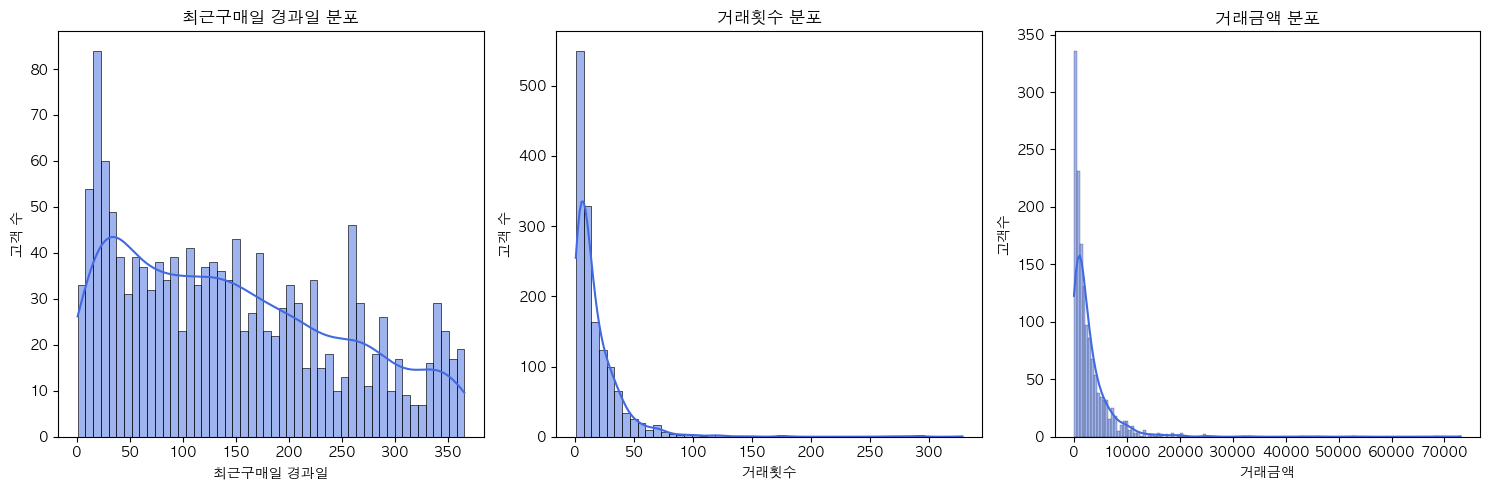

In [39]:
# Figure와 subplot (1행 3열) 설정

fig, axes = plt.subplots(1,3, figsize=(15,5))

# 최근구매일 경과일 분포
sns.histplot(cust_purchase_info['최근구매일경과일'], bins=50, kde=True, color='royalblue', ax=axes[0])
axes[0].set_title('최근구매일 경과일 분포')
axes[0].set_xlabel('최근구매일 경과일')
axes[0].set_ylabel('고객 수')

# 거래횟수(월) 분포
sns.histplot(cust_purchase_info['거래횟수'], bins=50, kde=True,color='royalblue', ax=axes[1])
axes[1].set_title('거래횟수 분포')
axes[1].set_xlabel('거래횟수')
axes[1].set_ylabel('고객 수')

# 거래금액 분포
sns.histplot(cust_purchase_info['결제금액'], kde=True, color='royalblue', ax=axes[2])
axes[2].set_title('거래금액 분포')
axes[2].set_xlabel('거래금액')
axes[2].set_ylabel('고객수')


# 여백 조정
plt.tight_layout()
plt.show()



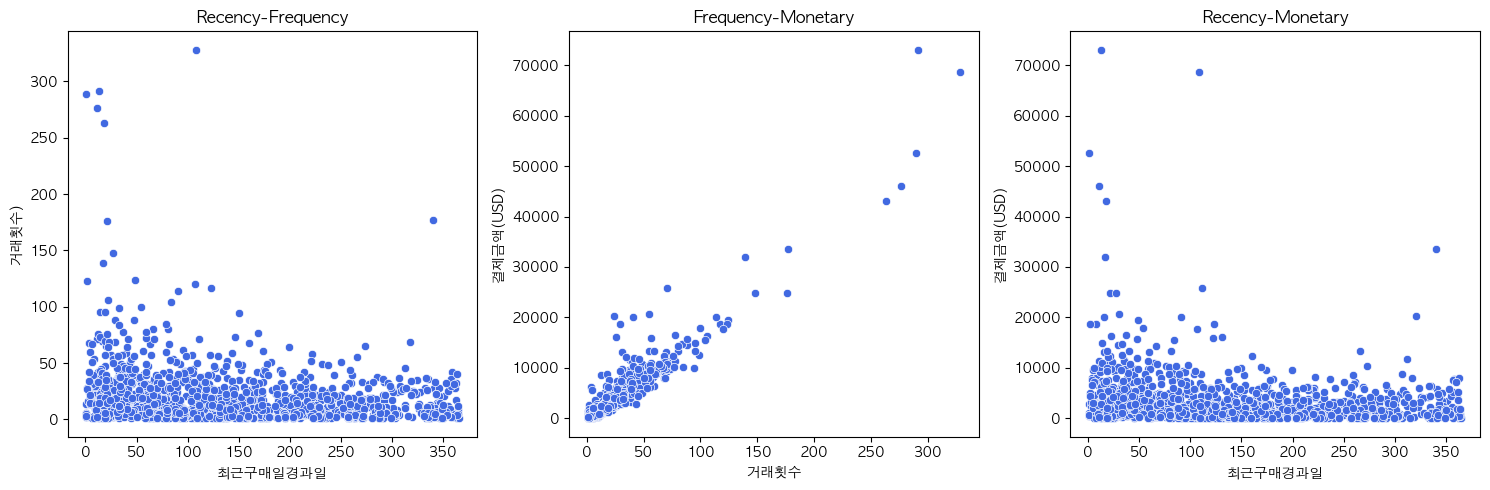

In [42]:
# 최근구매일(Recency), 평균거래주기(Frequency), 거래금액(Monetary)간 scatter plot

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(x= cust_purchase_info['최근구매일경과일'], y= cust_purchase_info['거래횟수'], ax=axes[0], color='royalblue')
axes[0].set_title('Recency-Frequency')
axes[0].set_xlabel('최근구매일경과일')
axes[0].set_ylabel('거래횟수)')

sns.scatterplot(x= cust_purchase_info['거래횟수'], y= cust_purchase_info['결제금액'], ax=axes[1], color='royalblue') # 거래금액에 log를 적용시켜서 분포를 안정화
axes[1].set_title('Frequency-Monetary')
axes[1].set_xlabel('거래횟수')
axes[1].set_ylabel('결제금액(USD)')

sns.scatterplot(x= cust_purchase_info['최근구매일경과일'], y= cust_purchase_info['결제금액'], ax=axes[2], color='royalblue') # 거래금액에 log를 적용시켜서 분포를 안정화
axes[2].set_title('Recency-Monetary')
axes[2].set_xlabel('최근구매경과일')
axes[2].set_ylabel('결제금액(USD)')

# 여백조정
plt.tight_layout()
plt.show()

In [43]:
cust_purchase_info

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108
...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271
1464,USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88
1465,USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195
1466,USER_1466,2019-10-23,2019-10-23,1,298.000,NaN,NaN,70


### RFM score 계산

In [44]:
# scaling data

# ▶ Min max scale = 최대값을 1, 최소값을 0으로 표준화하는 기법
from sklearn.preprocessing import minmax_scale

cust_purchase_info['recency'] = minmax_scale(cust_purchase_info['최근구매일경과일'], axis=0, copy=True)
cust_purchase_info['recency'] = 1- cust_purchase_info['recency'] # 경과일이 보통 높으면 안좋은 것, 1에서 빼줘서 어느정도 방향성 통일

cust_purchase_info['frequency'] = minmax_scale(cust_purchase_info['거래횟수'], axis=0, copy=True)
cust_purchase_info['monetary'] = minmax_scale(cust_purchase_info['결제금액'], axis=0, copy=True)

cust_purchase_info['score'] = cust_purchase_info['recency'] + cust_purchase_info['frequency'] + cust_purchase_info['monetary']

cust_purchase_info


,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108,0.706044,0.000000,0.000285,0.706329
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60,0.837912,0.091743,0.178669,1.108324
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74,0.799451,0.021407,0.017939,0.838796
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18,0.953297,0.030581,0.016521,1.000399
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108,0.706044,0.036697,0.016903,0.759644
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271,0.258242,0.006116,0.007286,0.271644
1464,USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88,0.760989,0.055046,0.029182,0.845217
1465,USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195,0.467033,0.003058,0.001329,0.471420
1466,USER_1466,2019-10-23,2019-10-23,1,298.000,NaN,NaN,70,0.810440,0.000000,0.004067,0.814506


In [45]:
# ▶ 100점을 곱해서 100점 만점으로 scaling

cust_purchase_info['score'] = minmax_scale(cust_purchase_info['score'], axis=0, copy=True) *100
cust_purchase_info['score'] = round(cust_purchase_info['score'],0)

In [46]:
cust_purchase_info

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108,0.706044,0.000000,0.000285,25.0
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60,0.837912,0.091743,0.178669,39.0
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74,0.799451,0.021407,0.017939,29.0
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18,0.953297,0.030581,0.016521,35.0
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108,0.706044,0.036697,0.016903,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271,0.258242,0.006116,0.007286,10.0
1464,USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88,0.760989,0.055046,0.029182,30.0
1465,USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195,0.467033,0.003058,0.001329,17.0
1466,USER_1466,2019-10-23,2019-10-23,1,298.000,NaN,NaN,70,0.810440,0.000000,0.004067,29.0


In [50]:
cust_purchase_info.to_csv('./고객별RFM점수.csv')

In [47]:
cust_rfm = cust_purchase_info.copy()

# RFM 기반 고객 세그먼트
cust_rfm.head()

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108,0.706044,0.000000,0.000285,25.0
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60,0.837912,0.091743,0.178669,39.0
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74,0.799451,0.021407,0.017939,29.0
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18,0.953297,0.030581,0.016521,35.0
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108,0.706044,0.036697,0.016903,27.0


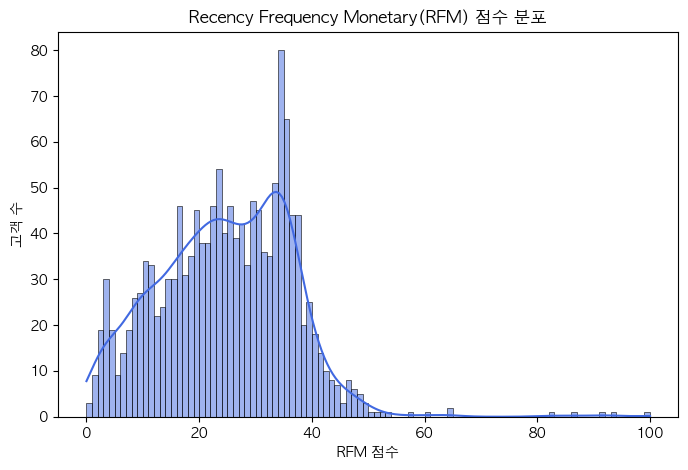

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(cust_rfm['score'], bins=100, kde=True, color='royalblue')
plt.title('Recency Frequency Monetary(RFM) 점수 분포')
plt.xlabel('RFM 점수')
plt.ylabel('고객 수')
plt.show()

In [303]:
cust_rfm.drop(columns=['고객등급'], inplace=True)

In [51]:
# 점수 등급
quantiles = cust_rfm['score'].quantile([0.2, 0.4, 0.6, 0.8])
quantiles

0.2    14.0
0.4    22.0
0.6    28.2
0.8    34.0
Name: score, dtype: float64

In [52]:
cust_rfm['고객등급'] = cust_rfm['score'].apply(lambda x : 'A등급' if x>=34 else
                                  ('B등급' if x>=28.2 else
                                   ('C등급' if x>=22.0 else
                                    ('D등급' if x>=14.0 else 
                                      'E등급'))))
cust_rfm

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score,고객등급
0,USER_0000,2019-09-15,2019-09-15,1,21.693,NaN,NaN,108,0.706044,0.000000,0.000285,25.0,C등급
1,USER_0001,2019-03-24,2019-11-02,31,13053.352,7.433333,0.247778,60,0.837912,0.091743,0.178669,39.0,A등급
2,USER_0002,2019-06-22,2019-10-19,8,1311.415,17.000000,0.566667,74,0.799451,0.021407,0.017939,29.0,B등급
3,USER_0003,2019-12-14,2019-12-14,11,1207.853,0.000000,0.000000,18,0.953297,0.030581,0.016521,35.0,A등급
4,USER_0004,2019-09-15,2019-09-15,13,1235.722,0.000000,0.000000,108,0.706044,0.036697,0.016903,27.0,C등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,2019-04-05,3,533.150,0.000000,0.000000,271,0.258242,0.006116,0.007286,10.0,E등급
1464,USER_1464,2019-06-22,2019-10-05,19,2132.738,5.833333,0.194444,88,0.760989,0.055046,0.029182,30.0,B등급
1465,USER_1465,2019-04-05,2019-06-20,2,97.997,76.000000,2.533333,195,0.467033,0.003058,0.001329,17.0,D등급
1466,USER_1466,2019-10-23,2019-10-23,1,298.000,NaN,NaN,70,0.810440,0.000000,0.004067,29.0,B등급


In [53]:
cust_rfm['고객등급'].nunique()

5

In [54]:
cust_rfm = cust_rfm.sort_values(by='고객등급', ascending=True)
cust_rfm.head(2)

,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score,고객등급
1467,USER_1467,2019-07-29,2019-10-10,53,6079.016,1.403846,0.046795,83,0.774725,0.159021,0.083200,36.0,A등급
1052,USER_1052,2019-06-14,2019-12-08,28,2847.124,6.555556,0.218519,24,0.936813,0.082569,0.038961,37.0,A등급


In [ ]:
# 그런데 quantile로 5등급을 공평하게 나눴는데 왜 고객등급에 속한 고객의 수가 다르지?
cust_rfm['고객등급'].value_counts()

고객등급
A등급    373
C등급    300
D등급    293
E등급    288
B등급    214
Name: count, dtype: int64

In [55]:
integrated_cust_info = cust_rfm.merge(cust, on=['고객ID'], how='left')
integrated_cust_info.head()


,고객ID,최초거래일,마지막거래일,거래횟수,결제금액,평균거래주기(일),평균거래주기(월),최근구매일경과일,recency,frequency,monetary,score,고객등급,성별,고객지역,가입기간
0,USER_1467,2019-07-29,2019-10-10,53,6079.016,1.403846,0.046795,83,0.774725,0.159021,0.083200,36.0,A등급,여,New Jersey,36
1,USER_1052,2019-06-14,2019-12-08,28,2847.124,6.555556,0.218519,24,0.936813,0.082569,0.038961,37.0,A등급,여,California,18
2,USER_0411,2019-12-16,2019-12-17,45,6975.185,0.022727,0.000758,15,0.961538,0.134557,0.095468,42.0,A등급,남,California,49
3,USER_0410,2019-08-24,2019-11-22,38,7086.414,2.432432,0.081081,40,0.892857,0.113150,0.096990,39.0,A등급,여,New York,10
4,USER_1056,2019-11-01,2019-11-01,47,9800.002,0.000000,0.000000,61,0.835165,0.140673,0.134135,39.0,A등급,남,New Jersey,38


In [56]:
integrated_cust_info.columns

Index(['고객ID', '최초거래일', '마지막거래일', '거래횟수', '결제금액', '평균거래주기(일)', '평균거래주기(월)',
       '최근구매일경과일', 'recency', 'frequency', 'monetary', 'score', '고객등급', '성별',
       '고객지역', '가입기간'],
      dtype='object')

In [57]:
integrated_cust_info.to_csv('./고객정보(거래이력+RFM+가입정보).csv')

In [59]:
cust_info = integrated_cust_info[['고객ID','고객등급', '성별',
       '고객지역', '가입기간']]

cust_info

,고객ID,고객등급,성별,고객지역,가입기간
0,USER_1467,A등급,여,New Jersey,36
1,USER_1052,A등급,여,California,18
2,USER_0411,A등급,남,California,49
3,USER_0410,A등급,여,New York,10
4,USER_1056,A등급,남,New Jersey,38
...,...,...,...,...,...
1463,USER_0420,E등급,여,New York,7
1464,USER_0421,E등급,여,California,49
1465,USER_1047,E등급,남,New York,28
1466,USER_0498,E등급,남,Chicago,37


In [61]:
total = merged.merge(cust_info, on ='고객ID', how='left')
total.drop_duplicates(inplace=True)
total.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액,고객등급,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10.0,138.339,A등급,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10.0,138.339,A등급,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1,OFF10,10.0,1.845,A등급,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1,SALE10,10.0,17.530,A등급,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1,AIO10,10.0,14.850,A등급,남,Chicago,12


In [62]:
total.to_csv('./data_for_cohort.csv')

### Cohort Analysis

In [63]:
# 고객별 최초거래일
test1 = (total.groupby('고객ID').agg(
    최초거래일=('거래날짜', 'min')
)).reset_index()
test1

,고객ID,최초거래일
0,USER_0000,2019-09-15
1,USER_0001,2019-03-24
2,USER_0002,2019-06-22
3,USER_0003,2019-12-14
4,USER_0004,2019-09-15
...,...,...
1463,USER_1463,2019-04-05
1464,USER_1464,2019-06-22
1465,USER_1465,2019-04-05
1466,USER_1466,2019-10-23


In [64]:
# 코호트 분석을 하기 위한 데이터 정제
result2= total.merge(test1, on='고객ID', how='left')
result2.sort_values(by='고객ID', inplace=True)

# 최초거래일 to_datetime
result2['최초거래일'] = pd.to_datetime(result2['최초거래일'])
result2['거래날짜'] = pd.to_datetime(result2['거래날짜'])
result2['최초구매-YM'] = result2['최초거래일'].apply(lambda x: x.strftime('%Y-%m'))
result2['구매-YM'] = result2['거래날짜'].apply(lambda x: x.strftime('%Y-%m'))

result2.head(20)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,쿠폰코드,할인율,최종금액,고객등급,성별,고객지역,가입기간,최초거래일,최초구매-YM,구매-YM
38120,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used,9,SALE30,30.0,13.993,C등급,여,New York,31,2019-09-15,2019-09,2019-09
38125,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,9,OFF30,30.0,3.850,C등급,여,New York,31,2019-09-15,2019-09,2019-09
10691,USER_0001,Transaction_5273,2019-03-24,Product_0338,Apparel,1,59.99,6.50,Clicked,3,SALE30,30.0,59.990,A등급,남,New York,20,2019-03-24,2019-03,2019-03
44626,USER_0001,Transaction_20179,2019-11-01,Product_0195,Lifestyle,3,3.19,6.00,Clicked,11,EXTRA20,20.0,3.190,A등급,남,New York,20,2019-03-24,2019-03,2019-11
44627,USER_0001,Transaction_20179,2019-11-01,Product_0922,Apparel,1,8.79,6.00,Clicked,11,SALE20,20.0,8.790,A등급,남,New York,20,2019-03-24,2019-03,2019-11
44628,USER_0001,Transaction_20180,2019-11-02,Product_0989,Nest-USA,1,149.00,6.00,Not Used,11,ELEC20,20.0,149.000,A등급,남,New York,20,2019-03-24,2019-03,2019-11
44629,USER_0001,Transaction_20181,2019-11-02,Product_0989,Nest-USA,1,149.00,6.00,Clicked,11,ELEC20,20.0,149.000,A등급,남,New York,20,2019-03-24,2019-03,2019-11
44630,USER_0001,Transaction_20182,2019-11-02,Product_0981,Nest-USA,1,149.00,12.99,Used,11,ELEC20,20.0,119.200,A등급,남,New York,20,2019-03-24,2019-03,2019-11
44631,USER_0001,Transaction_20183,2019-11-02,Product_0981,Nest-USA,2,149.00,6.00,Clicked,11,ELEC20,20.0,149.000,A등급,남,New York,20,2019-03-24,2019-03,2019-11
44632,USER_0001,Transaction_20184,2019-11-02,Product_0980,Nest-USA,1,149.00,6.00,Not Used,11,ELEC20,20.0,149.000,A등급,남,New York,20,2019-03-24,2019-03,2019-11


In [65]:
result2['총거래액'] = result2['최종금액'] * result2['수량']
result2.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,...,할인율,최종금액,고객등급,성별,고객지역,가입기간,최초거래일,최초구매-YM,구매-YM,총거래액
38120,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.0,Used,9,...,30.0,13.993,C등급,여,New York,31,2019-09-15,2019-09,2019-09,13.993
38125,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.0,Used,9,...,30.0,3.850,C등급,여,New York,31,2019-09-15,2019-09,2019-09,7.700
10691,USER_0001,Transaction_5273,2019-03-24,Product_0338,Apparel,1,59.99,6.5,Clicked,3,...,30.0,59.990,A등급,남,New York,20,2019-03-24,2019-03,2019-03,59.990
44626,USER_0001,Transaction_20179,2019-11-01,Product_0195,Lifestyle,3,3.19,6.0,Clicked,11,...,20.0,3.190,A등급,남,New York,20,2019-03-24,2019-03,2019-11,9.570
44627,USER_0001,Transaction_20179,2019-11-01,Product_0922,Apparel,1,8.79,6.0,Clicked,11,...,20.0,8.790,A등급,남,New York,20,2019-03-24,2019-03,2019-11,8.790


In [86]:
result2_A = result2[result2['고객등급']=='A등급']
result2_A.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,...,할인율,최종금액,고객등급,성별,고객지역,가입기간,최초거래일,최초구매-YM,구매-YM,총거래액
10691,USER_0001,Transaction_5273,2019-03-24,Product_0338,Apparel,1,59.99,6.5,Clicked,3,...,30.0,59.99,A등급,남,New York,20,2019-03-24,2019-03,2019-03,59.99
44626,USER_0001,Transaction_20179,2019-11-01,Product_0195,Lifestyle,3,3.19,6.0,Clicked,11,...,20.0,3.19,A등급,남,New York,20,2019-03-24,2019-03,2019-11,9.57
44627,USER_0001,Transaction_20179,2019-11-01,Product_0922,Apparel,1,8.79,6.0,Clicked,11,...,20.0,8.79,A등급,남,New York,20,2019-03-24,2019-03,2019-11,8.79
44628,USER_0001,Transaction_20180,2019-11-02,Product_0989,Nest-USA,1,149.00,6.0,Not Used,11,...,20.0,149.00,A등급,남,New York,20,2019-03-24,2019-03,2019-11,149.00
44629,USER_0001,Transaction_20181,2019-11-02,Product_0989,Nest-USA,1,149.00,6.0,Clicked,11,...,20.0,149.00,A등급,남,New York,20,2019-03-24,2019-03,2019-11,149.00


In [87]:
# 코호트 & 최초구매일

grouped = result2_A.groupby(['최초구매-YM','구매-YM'])
print(grouped)

cohorts = grouped.agg({'고객ID': pd.Series.nunique,
                        '거래ID': pd.Series.nunique, 
                        '총거래액': np.sum})

cohorts.rename(columns={'고객ID':'전체고객수',
                        '거래ID':'전체거래수'}, inplace=True)
cohorts.head()

/var/folders/yy/_061l71j3xb3mw44dldrpffc0000gn/T/ipykernel_3909/4148516599.py:6: FutureWarning: The provided callable <function sum at 0x10762cc20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cohorts = grouped.agg({'고객ID': pd.Series.nunique,


전체고객수  전체거래수        총거래액
최초구매-YM 구매-YM                            
2019-01 2019-01     53    717  130371.226
        2019-02      9    194   32709.808
        2019-03     15    228   31208.706
        2019-04     13    273   98120.125
        2019-05     11    131   17006.810

In [88]:
cohorts

전체고객수  전체거래수        총거래액
최초구매-YM 구매-YM                            
2019-01 2019-01     53    717  130371.226
        2019-02      9    194   32709.808
        2019-03     15    228   31208.706
        2019-04     13    273   98120.125
        2019-05     11    131   17006.810
...                ...    ...         ...
2019-10 2019-11      3     26    8802.090
        2019-12      4     17    2416.967
2019-11 2019-11     38    851  162883.458
        2019-12      7     21    4032.306
2019-12 2019-12     90   1242  217555.525

[78 rows x 3 columns]

In [89]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [90]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

전체고객수  전체거래수        총거래액  CohortPeriod
최초구매-YM 최초구매-YM 구매-YM                                          
2019-01 2019-01 2019-01     53    717  130371.226             1
                2019-02      9    194   32709.808             2
                2019-03     15    228   31208.706             3
                2019-04     13    273   98120.125             4
                2019-05     11    131   17006.810             5

In [91]:
cohorts.index = cohorts.index.droplevel(0)   # 첫 번째 인덱스 제거

In [92]:
cohorts = cohorts[['전체고객수','전체거래수','총거래액','CohortPeriod']]
cohorts.head()

전체고객수  전체거래수        총거래액  CohortPeriod
최초구매-YM 구매-YM                                          
2019-01 2019-01     53    717  130371.226             1
        2019-02      9    194   32709.808             2
        2019-03     15    228   31208.706             3
        2019-04     13    273   98120.125             4
        2019-05     11    131   17006.810             5

In [93]:
cohorts.head(13)

전체고객수  전체거래수        총거래액  CohortPeriod
최초구매-YM 구매-YM                                          
2019-01 2019-01     53    717  130371.226             1
        2019-02      9    194   32709.808             2
        2019-03     15    228   31208.706             3
        2019-04     13    273   98120.125             4
        2019-05     11    131   17006.810             5
        2019-06     24    239   31103.765             6
        2019-07     21    300   64586.317             7
        2019-08     26    228   33769.280             8
        2019-09     16    187   26799.207             9
        2019-10     21    222   39605.286            10
        2019-11     20    190   37748.982            11
        2019-12     33    457   83106.632            12
2019-02 2019-02     28    481   77903.854             1

In [94]:
cohorts.reset_index(inplace=True) # cohorts의 기존 Multi인덱스 제거
cohorts.set_index(['최초구매-YM', 'CohortPeriod'], inplace=True) # 최초구매일, CohortPeriod로 다시 계층형 인덱스 설정

cohort_group_size = cohorts['전체고객수'].groupby(level=0).first() # e.g., 최초 구매년월이 2019-01 인 코호트의 고객수
cohort_group_size.head()

최초구매-YM
2019-01    53
2019-02    28
2019-03    37
2019-04    26
2019-05    25
Name: 전체고객수, dtype: int64

In [95]:
cohort_group_revenue= cohorts['총거래액'].groupby(level=0).first() # e.g., 최초 구매년월이 2019-01 인 코호트의 거래금액
cohort_group_revenue.head()

최초구매-YM
2019-01    130371.226
2019-02     77903.854
2019-03     75101.038
2019-04     46692.768
2019-05     52586.934
Name: 총거래액, dtype: float64

In [96]:
cohort_group_size.info()

<class 'pandas.core.series.Series'>
Index: 12 entries, 2019-01 to 2019-12
Series name: 전체고객수
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 492.0+ bytes


In [97]:
# 고객 잔존률

user_retention = cohorts['전체고객수'].unstack(1).divide(cohort_group_size, axis=0) # 동일한 인덱스(행 이름)을 가진 요소끼리 나눈다! 각 코호트 행마다 자신에게 해당하는  cohort_group_size를 가져와서 나눗셈
user_retention.head(12)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12
최초구매-YM,,,,,,,,,,,,
2019-01,1.0,0.169811,0.283019,0.245283,0.207547,0.452830,0.396226,0.490566,0.301887,0.396226,0.377358,0.622642
2019-02,1.0,0.142857,0.142857,0.214286,0.285714,0.357143,0.357143,0.214286,0.142857,0.357143,0.571429,NaN
2019-03,1.0,0.162162,0.378378,0.297297,0.351351,0.486486,0.243243,0.405405,0.378378,0.513514,NaN,NaN
2019-04,1.0,0.230769,0.269231,0.307692,0.269231,0.192308,0.192308,0.500000,0.461538,NaN,NaN,NaN
2019-05,1.0,0.160000,0.120000,0.240000,0.200000,0.280000,0.480000,0.320000,NaN,NaN,NaN,NaN
2019-06,1.0,0.363636,0.272727,0.181818,0.090909,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.176471,0.117647,0.176471,0.470588,0.470588,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.142857,0.214286,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.166667,0.500000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


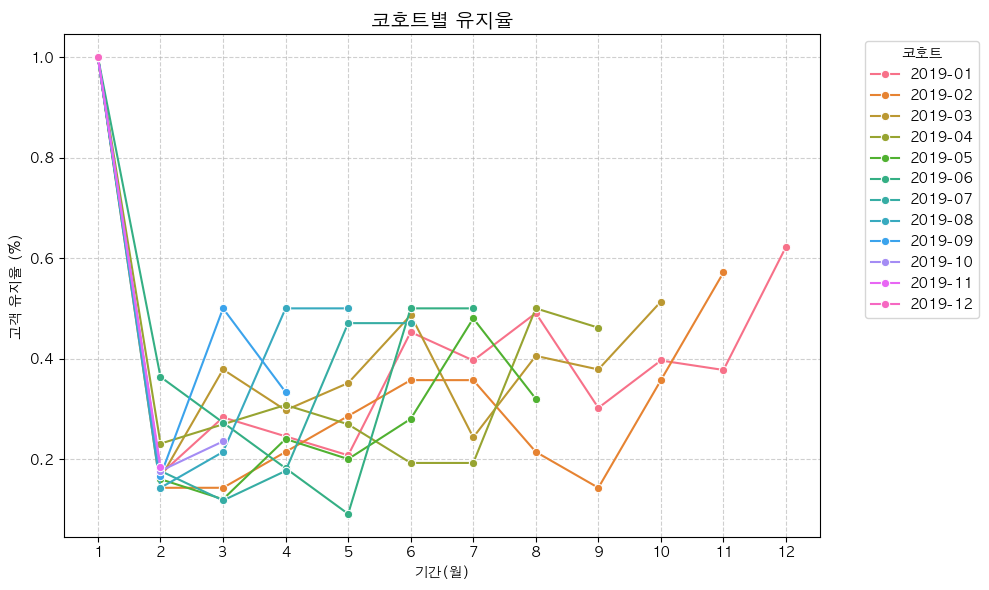

In [98]:
import seaborn as sns
import pandas as pd

# DataFrame melt (wide → long 형태로 변환)
user_long = user_retention.reset_index().melt(
    id_vars='최초구매-YM',
    var_name='기간(월)',
    value_name='고객 유지율'
)

# 그래프
plt.figure(figsize=(10,6))
sns.lineplot(
    data=user_long,
    x='기간(월)',
    y='고객 유지율',
    hue='최초구매-YM',
    marker='o', color='royalblue'
)

plt.title('코호트별 유지율', fontsize=14)
plt.xlabel('기간(월)')
plt.ylabel('고객 유지율 (%)')
plt.legend(title='코호트', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(user_retention.columns)
plt.tight_layout()
plt.show()


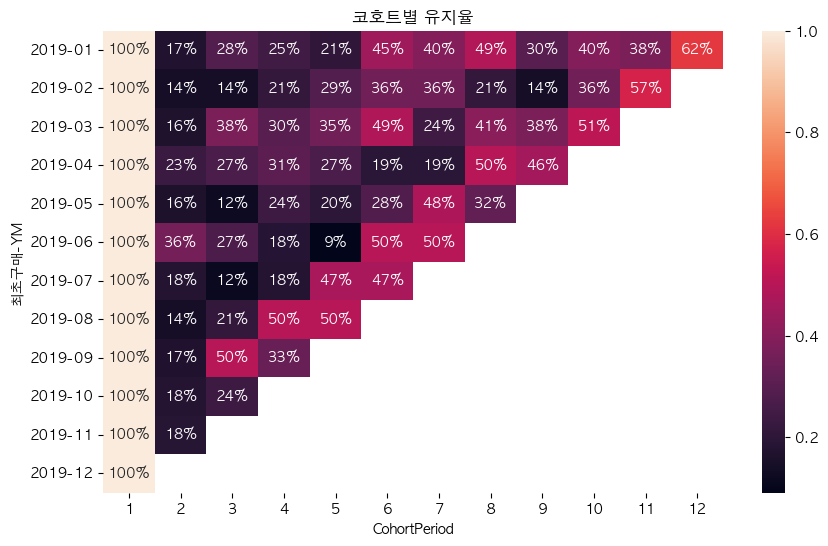

In [100]:
# 히트맵으로 나타내기
plt.figure(figsize=(10,6))
plt.title('코호트별 유지율')
sns.heatmap(user_retention, mask = user_retention.isnull(), annot=True, fmt='.0%' )
plt.show()


In [101]:
# 매출 잔존률
revenue_retention = cohorts['총거래액'].unstack(1).divide(cohort_group_revenue, axis=0) # 동일한 인덱스(행 이름)을 가진 요소끼리 나눈다! 
revenue_retention.head()

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12
최초구매-YM,,,,,,,,,,,,
2019-01,1.0,0.250897,0.239383,0.752621,0.130449,0.238578,0.495403,0.259024,0.205561,0.303789,0.289550,0.637461
2019-02,1.0,0.070906,0.086264,0.143197,0.168819,0.312717,0.188327,0.277445,0.139747,0.339957,0.563441,NaN
2019-03,1.0,0.368452,0.239744,0.263439,0.356154,0.476429,0.307090,0.402042,0.293551,0.437362,NaN,NaN
2019-04,1.0,0.174735,0.166171,0.161046,0.188597,0.266149,0.199631,1.131390,0.354548,NaN,NaN,NaN
2019-05,1.0,0.038246,0.111092,0.138440,0.131530,0.528177,0.641993,0.193999,NaN,NaN,NaN,NaN


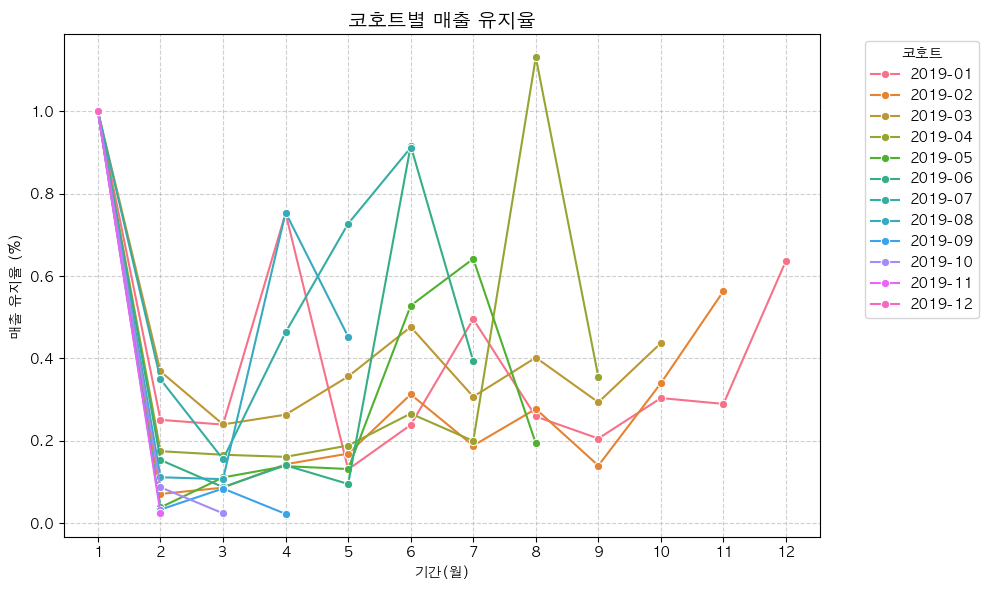

In [102]:
# DataFrame melt (wide → long 형태로 변환)
revenue_long = revenue_retention.reset_index().melt(
    id_vars='최초구매-YM',
    var_name='기간(월)',
    value_name='매출 유지율'
)

# 그래프
plt.figure(figsize=(10,6))
sns.lineplot(
    data=revenue_long,
    x='기간(월)',
    y='매출 유지율',
    hue='최초구매-YM',
    marker='o'
)

plt.title('코호트별 매출 유지율', fontsize=14)
plt.xlabel('기간(월)')
plt.ylabel('매출 유지율 (%)')
plt.legend(title='코호트', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(revenue_retention.columns)
plt.tight_layout()
plt.show()

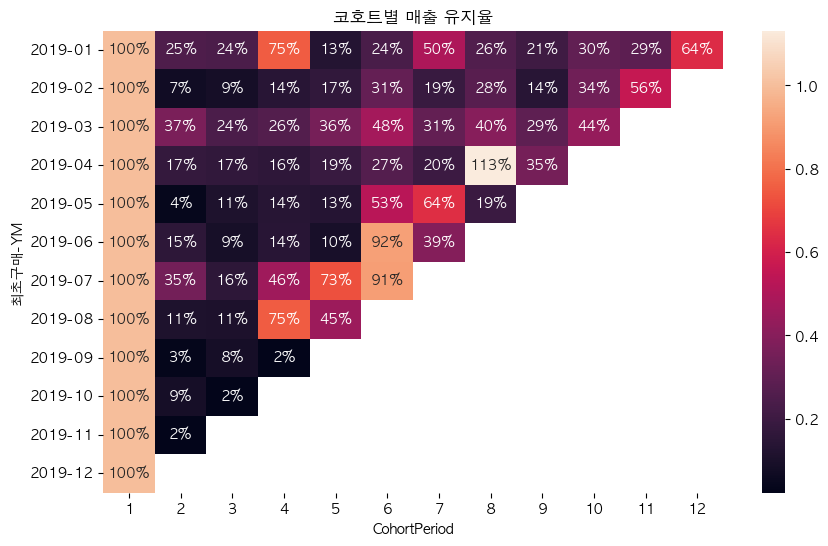

In [103]:
# 히트맵으로 나타내기
plt.figure(figsize=(10,6))
plt.title('코호트별 매출 유지율')
sns.heatmap(revenue_retention, mask = revenue_retention.isnull(), annot=True, fmt='.0%' )
plt.show()